In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We have been asked to use our hypothesis testing skills to answer the following questions:

1. Do smokers have higher insurance charges than non-smokers?
2. Are men more likely to smoke than women?
3. Do different regions have different charges, on average?

For each question:

1. State your null and alt hypothesis
2. Select the correct test according to the data type and number of samples. 
3. Test the assumptions of your selected test.
4. Execute the selected test, or alternative test (if you do not meet the assumptions)
5. Interpret your p value and reject or fail to reject the null hypothesis.
6. Show a supporting visualization that helps display the result. 

**Q1: Do smokers have higher insurance charges than non-smokers?**

1. Null: There is no difference in insurance charges between smokers and non-smokers.

    Alt: There is a significant difference in insurance charges between smokers and non-smokers.

2. Our target feature is numeric and we have 2 samples, so this is a **2 sample T-Test**.

3. Assumption testing

  Outliers






In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
# Check for outliers
needed_cols = ['smoker', 'charges']
df[needed_cols]

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
...,...,...
1333,no,10600.54830
1334,no,2205.98080
1335,no,1629.83350
1336,no,2007.94500


In [ ]:
smoker_df = df.loc[df['smoker']=='yes', needed_cols]

In [ ]:
non_smoker_df = df.loc[df['smoker']=='no', needed_cols]

In [ ]:
plot_df_smoker = pd.concat([smoker_df, non_smoker_df])
plot_df_smoker.head()

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768


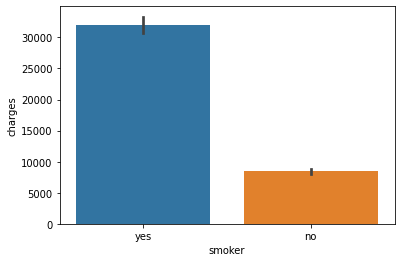

In [ ]:
sns.barplot(data=plot_df_smoker, y='charges', x='smoker');

In [ ]:
smoker_group = smoker_df['charges']
non_smoker_group = non_smoker_df['charges']

In [ ]:
smoker_outliers = np.abs(stats.zscore(smoker_group))>3
smoker_outliers.sum()

0

In [ ]:
non_smoker_outliers = np.abs(stats.zscore(non_smoker_group))>3
non_smoker_outliers.sum()

24

There are 24 outliers in the non smoker group, and 0 in the smoker group.

In [ ]:
non_smoker_group = non_smoker_group[~non_smoker_outliers]
non_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

Normality Test

In [ ]:
results = stats.normaltest(non_smoker_group)
results

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [ ]:
len(non_smoker_group)

1040

In [ ]:
results = stats.normaltest(smoker_group)
results

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [ ]:
len(smoker_group)

274

Both groups are normally distributed

Equal Variance Test

In [ ]:
result = stats.levene(non_smoker_group, smoker_group)
result.pvalue<0.05

True

In [ ]:
if result.pvalue < 0.05:
  print('The groups do not have equal variance')
else:
  print('The groups do have equal variance')

The groups do not have equal variance


Final Hypothesis Test

In [ ]:
result = stats.ttest_ind(non_smoker_group, smoker_group, equal_var=False)
result

Ttest_indResult(statistic=-33.732305987092516, pvalue=2.575322662587431e-104)

Conclusion: Our p value is very much less than our alpha of 0.05. Therefore, we reject the null hypothesis and infer that there is indeed a difference between the charges of smokers and non smokers.

**Q2: Are men more likely to smoke than women?** 

1. Null and Alt

Null: There is no difference between the chances of smoking between men and women.

Alt: Men and women have a different chances of being a smoker. 

2. Our target variable is categorical so we will perform a chi-square test.

3. Hypothesis test

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [ ]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [ ]:
print(p)

0.006548143503580696


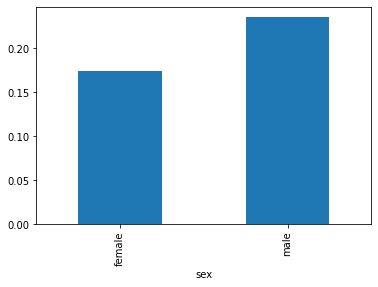

In [ ]:
summ_table = pd.crosstab(df['sex'], df['smoker'], normalize='index')
summ_table['yes'].plot(kind='bar');

Our p value is less than our alpha so we will reject the null hypothesis and infer that there is a difference in the likelihood of smoking between men and women. Based on our barplot, it seems men are more likely to smoke. 

Q3: Do different regions have different charges, on average?

1. Null and Alt

Null: There is no difference in the average charges between regions.

Alt: There is a difference in the average charges between regions. 

2. Our target variable is numeric and we have more than 2 samples. So we will perform an ANOVA test and, if we reject the null hypothesis, a post-hoc tukey test. 

3. Assumption testing

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

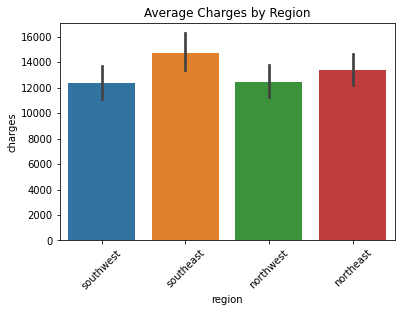

In [ ]:
ax = sns.barplot(data=df, x='region', y='charges')
ax.set_title('Average Charges by Region')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [ ]:
groups = {}
for i in df['region'].unique():
  data = df.loc[df['region']==i, 'charges'].copy()
  groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [ ]:
# Testing assumption of normality

norm_results = {}
for i, data in groups.items():
  stat, p = stats.normaltest(data)
  norm_results[i] = {'n': len(data),
                            'p':p,
                            'test stat': stat,}

norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [ ]:
norm_results_df['sig'] = norm_results_df['p'] < 0.05
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


The groups do NOT have a normal distribution, but our sample sizes are large enough that we can ignore this. 

In [ ]:
# Testing assumption of equal variance
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

Our groups do not have equal variance, so we will use a kruskal test.

In [ ]:
results = stats.kruskal(*groups.values())
results

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

Our pvalue is greater than our alpha, so we fail to reject the null and infer that there is no difference in the amounts charged between regions. 